# <font color='27e2c7'>ANÁLISE DE DADOS – B2W DIGITAL BIT SP / FRETE</font>

## Tabela de Conteúdos

[1. Informações](#1.-Informações)

[2. Dados](#2.-Dados)

[3. Visualizações](#3.-Visualizações)

* [3.1 Categóricas](#3.1-Categóricas)

* [3.2 Faturamentos](#3.2-Faturamentos)

* [3.3 Custos](#3.3-Custos)

* [3.4 Descontos](#3.4-Descontos)

* [3.5 Visitas & Vendas](#3.5-Visitas-&-Vendas)


## 1. Informações
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

**Objetivo:** Analisar vendas de e-commerce.

**Fonte dos dados**: B2W

**Descrição das variáveis:**

| Variável | Descrição | Tipo |  
|:---|:---|:---|
| mes | Ano - Mês | Nominal |
|departamento | Nome do departamento | Nominal |
| uf | Estado da federação | Nominal |
| item | Código do item | Nominal |
| faturamento_produto | Faturamento do produto | Contínua |
| faturamento_frete | Faturamento do frete | Contínua |
| custo_produto | Custo do produto | Contínua |
| custo_frete | Custo do frete | Contínua |
| custo_mkt | Custo do marketing | Contínua |
| desconto_produto | Desconto no produto | Contínua | 
| desconto_frete | Desconto no frete | Contínua |
| visitas | Número de visitas | Discreta |
| vendas | Número de vendas | Discreta |

## 2. Dados
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# import data
df = pd.read_csv("data/base_db.csv", sep=';')

In [3]:
print("Amostra da base de dados:")
df.sample(5)

Amostra da base de dados:


,mes,departamento,uf,item,faturamento_produto,faturamento_frete,custo_produto,custo_frete,custo_mkt,desconto_produto,desconto_frete,visitas,vendas
49,2018-07,Maquinas Fotogr ficas,PE,2,523530.0,0.0,415500.0,30470,24930,58170.0,33240.0,2506,238
59,2018-08,Bolas de Gude,PE,3,6066.9,10978.2,1926.0,7704,963,674.1,577.8,10810,963
60,2018-08,Bolas de Gude,SP,1,4878.0,10298.0,1084.0,7588,1084,542.0,542.0,8127,1101
0,2018-06,Bolas de Gude,MT,1,2576.4,5424.0,1356.0,4520,452,135.6,0.0,4618,479
31,2018-07,Bolas de Gude,PE,2,8227.8,15672.0,2612.0,10448,2612,914.2,0.0,10837,1306


In [4]:
print(f"A base de dados possui {df.shape[0]} linhas e {df.shape[1]} variáveis.")

A base de dados possui 108 linhas e 13 variáveis.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mes                  108 non-null    object 
 1   departamento         108 non-null    object 
 2   uf                   108 non-null    object 
 3   item                 108 non-null    int64  
 4   faturamento_produto  108 non-null    float64
 5   faturamento_frete    108 non-null    float64
 6   custo_produto        108 non-null    float64
 7   custo_frete          108 non-null    int64  
 8   custo_mkt            108 non-null    int64  
 9   desconto_produto     108 non-null    float64
 10  desconto_frete       108 non-null    float64
 11  visitas              108 non-null    int64  
 12  vendas               108 non-null    int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 11.1+ KB


* Não há valores nulos.

In [6]:
# correct typo
df.loc[df['departamento'] == 'Maquinas Fotogr\xa0ficas', 'departamento'] = 'Maquinas Fotograficas'

In [7]:
print(f"Os dados referem-se aos:")
print(f"- meses: {df['mes'].unique().tolist()}.")
print(f"- departamentos: {df['departamento'].unique().tolist()}")
print(f"- estados: {df['uf'].unique().tolist()}")
print(f"- itens: {df['item'].unique().tolist()}")

Os dados referem-se aos:
- meses: ['2018-06', '2018-07', '2018-08', '2018-09'].
- departamentos: ['Bolas de Gude', 'Cadeiras', 'Maquinas Fotograficas']
- estados: ['MT', 'PE', 'SP']
- itens: [1, 2, 3]


## 3. Visualizações 
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

### 3.1 Categóricas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

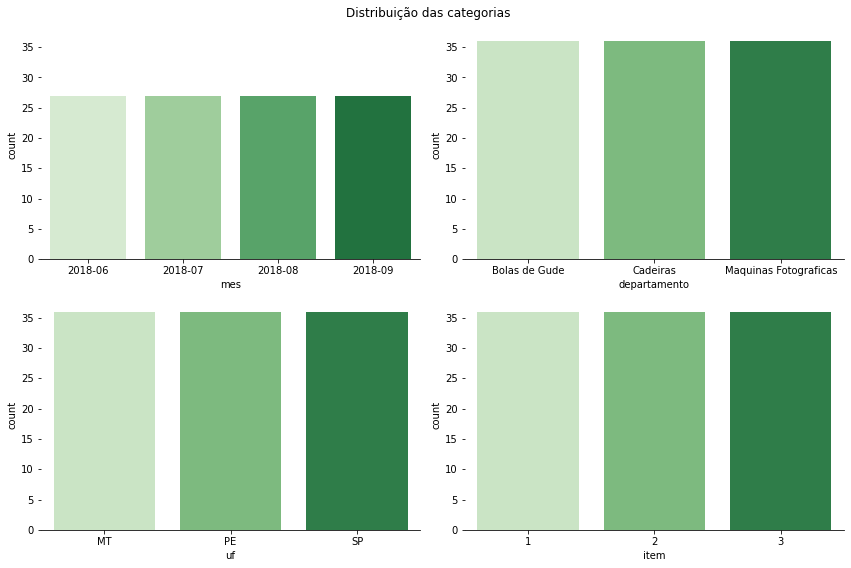

In [8]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
sns.despine(left=True)

sns.countplot(x="mes", data=df, ax=axes[0, 0],  palette="Greens")
sns.countplot(x="departamento", data=df, ax=axes[0, 1],  palette="Greens")
sns.countplot(x="uf", data=df, ax=axes[1, 0],  palette="Greens")
sns.countplot(x="item", data=df, ax=axes[1, 1],  palette="Greens")


# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Distribuição das categorias')
plt.tight_layout()

* As variáveis 'mes', 'departamento', 'uf' e 'item' estão uniformemente distribuídas.

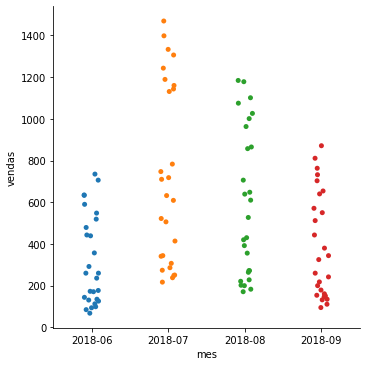

In [89]:
sns.catplot(x='mes', y='vendas', data=df)
plt.suptitle('Vendas por mês')

* Pico de vendas ocorreu em julho.

### 3.2 Faturamentos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

/home/pathilink/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


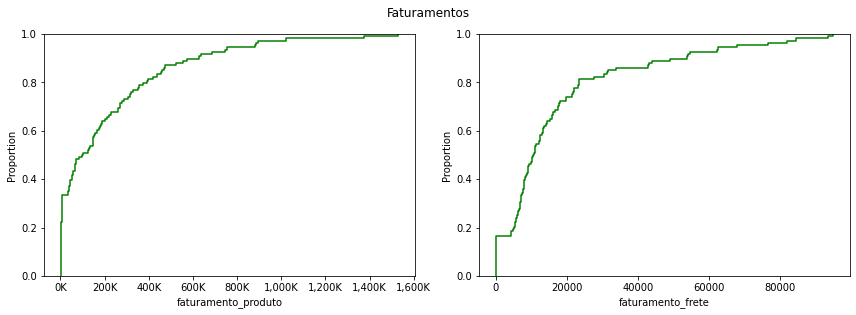

In [62]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

g=sns.ecdfplot(df['faturamento_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['faturamento_frete'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Faturamentos')
plt.tight_layout()

* Cerca de 38% dos produtos gera um faturamento um pouco acima de zero.

* Cerca de 75% dos produtos gera um faturamento de frete de até 20000. Destes, 19% possui faturamento de até 5000.

### 3.3 Custos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

/home/pathilink/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


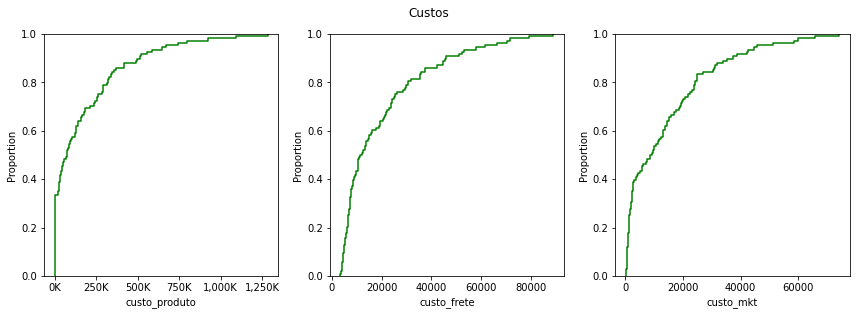

In [63]:
f, axes = plt.subplots(2, 3, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

g=sns.ecdfplot(df['custo_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['custo_frete'], ax=axes[0, 1],  color="green")
sns.ecdfplot(df['custo_mkt'], ax=axes[0, 2],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])
f.delaxes(ax=axes[1, 2])

xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Custos')
plt.tight_layout()

* Por volta de 38% dos produtos acumula custo zero.  

* 40% dos produtos tem um custo do frete de até 10000.

* O custo em marketing de 40% dos produtos é um pouco maior do que zero.

### 3.4 Descontos
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

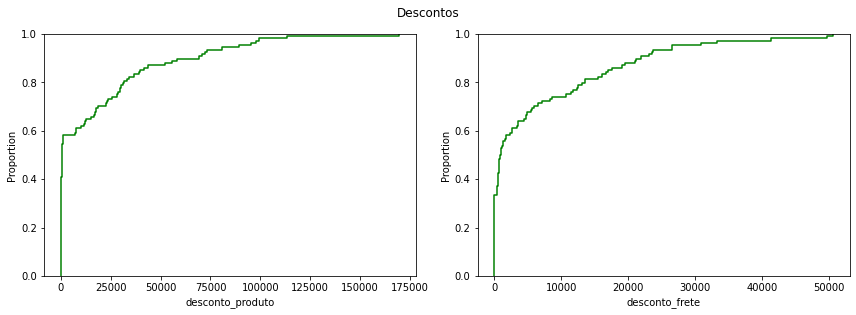

In [64]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['desconto_produto'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['desconto_frete'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Descontos')
plt.tight_layout()

* 60% dos produtos possuem nenhum ou um pequeno desconto.

* Cerca de 35% dos produtos possuem nenhum ou um pequeno desconto no frete.

### 3.5 Visitas & Vendas
[Retorna a Tabela de Conteúdos](#Tabela-de-Conteúdos)

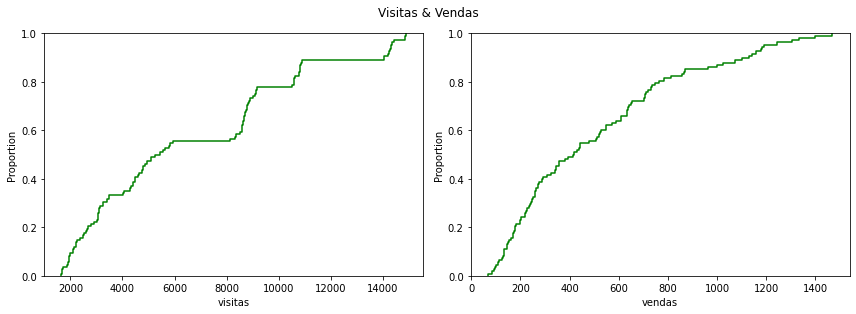

In [65]:
f, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
#sns.despine(left=True)

sns.ecdfplot(df['visitas'], ax=axes[0, 0],  color="green")
sns.ecdfplot(df['vendas'], ax=axes[0, 1],  color="green")

f.delaxes(ax=axes[1, 0])
f.delaxes(ax=axes[1, 1])

# plt.setp(axes, yticks=[])
# plt.setp(axes, xticks=[])
plt.suptitle('Visitas & Vendas')
plt.tight_layout()

Text(0.5, 0.98, 'Visitas x Vendas')

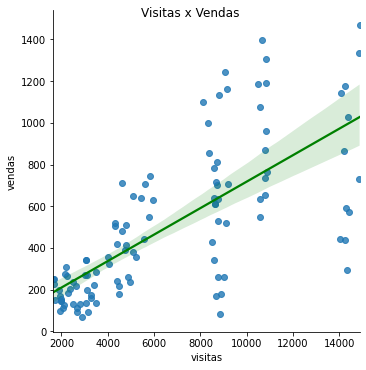

In [75]:
sns.lmplot(x='visitas', y='vendas', data=df, line_kws={'color': 'green'})
plt.suptitle('Visitas x Vendas')

* Conforme aumenta o número de visitas, aumenta o número de vendas apesar de haver alguns *gaps*.

* A maior parte das visitas concentram-se em até 6000 com as vendas não ultrapassando 600, ou seja, 10 vezes menor do que o número de visitas.

Text(0.5, 0.98, 'Vendas x Descontos (produto e frete)')

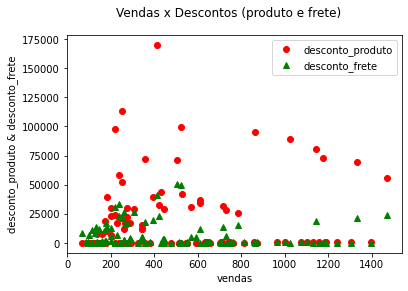

In [88]:
plt.plot(df['vendas'], df['desconto_produto'], 'ro')
plt.plot(df['vendas'], df['desconto_frete'], 'g^')
plt.xlabel('vendas')
plt.ylabel('desconto_produto & desconto_frete')
plt.legend(["desconto_produto", "desconto_frete"])
plt.suptitle('Vendas x Descontos (produto e frete)')

In [81]:
corr = df.corr()
corr

,item,faturamento_produto,faturamento_frete,custo_produto,custo_frete,custo_mkt,desconto_produto,desconto_frete,visitas,vendas
item,1.000000,0.211554,-0.121029,0.220571,-0.137678,-0.100031,0.150372,-0.054921,-0.001133,-0.152089
faturamento_produto,0.211554,1.000000,-0.006745,0.994069,0.359845,0.576005,0.699155,0.707289,-0.312853,-0.278779
faturamento_frete,-0.121029,-0.006745,1.000000,-0.061291,0.856041,0.683868,0.370858,-0.055891,0.607203,0.435900
custo_produto,0.220571,0.994069,-0.061291,1.000000,0.312350,0.544930,0.707145,0.713396,-0.357723,-0.303256
custo_frete,-0.137678,0.359845,0.856041,0.312350,1.000000,0.911597,0.649797,0.454975,0.389284,0.280498
custo_mkt,-0.100031,0.576005,0.683868,0.544930,0.911597,1.000000,0.746891,0.610620,0.134914,0.157941
desconto_produto,0.150372,0.699155,0.370858,0.707145,0.649797,0.746891,1.000000,0.655802,0.067443,0.091977
desconto_frete,-0.054921,0.707289,-0.055891,0.713396,0.454975,0.610620,0.655802,1.000000,-0.227695,-0.127292
visitas,-0.001133,-0.312853,0.607203,-0.357723,0.389284,0.134914,0.067443,-0.227695,1.000000,0.715826
vendas,-0.152089,-0.278779,0.435900,-0.303256,0.280498,0.157941,0.091977,-0.127292,0.715826,1.000000


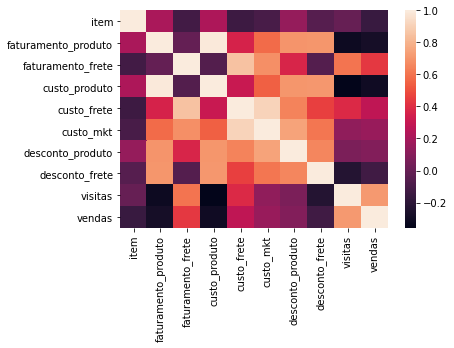

In [82]:
ax = sns.heatmap(corr)

* Aumentar o valor gasto em marketing não aumentará as vendas. Isso porque ao analisar a métrica de conversão percebe-se que o consumidor até visita o site mas não compra, ou seja, não converte em vendas.

* Uma sugestão é aumentar a proporção de produtos com desconto. A maioria dos produtos possuem nenhum ou um desconto muito pequeno. 

* Outra sugestão é aumentar o desconto no frete pois 35% dos produtos possui nenhum ou um desconto muito pequeno no frete.

💡 

In [31]:
df.columns

Index(['mes', 'departamento', 'uf', 'item', 'faturamento_produto',
       'faturamento_frete', 'custo_produto', 'custo_frete', 'custo_mkt',
       'desconto_produto', 'desconto_frete', 'visitas', 'vendas'],
      dtype='object')

<AxesSubplot:xlabel='item', ylabel='count'>

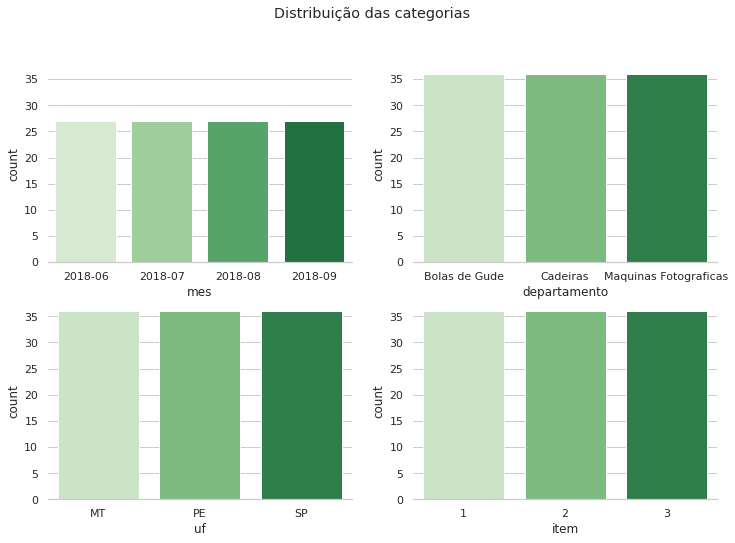

In [110]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey='col')
fig.suptitle('Distribuição das categorias')
sns.despine(left=True)

# mes
sns.countplot(ax=axes[0, 0], x="mes", palette="Greens", data=df)

# departamento
sns.countplot(ax=axes[0, 1], x="departamento", palette="Greens", data=df)

# uf
sns.countplot(ax=axes[1, 0], x="uf", palette="Greens", data=df)

# item
sns.countplot(ax=axes[1, 1], x="item", palette="Greens", data=df)
#axes[1, 1].set_title('departamento')

In [16]:
# copy dataframe
df_ = df.copy()

In [17]:
# add calculated variables to dataframe 
df_['faturamento_total'] = df_['faturamento_produto'] + df_['faturamento_frete']
df_['custo_total'] = df_['custo_produto'] + df_['custo_frete'] + df_['custo_mkt']
df_['desconto_total'] = df_['desconto_produto'] + df_['desconto_frete'] 
df_['lucro'] = df_['faturamento_total'] - df_['custo_total'] - df_['desconto_total']
df_['conversao'] = df_['vendas'] / df_['visitas']

✔️ Foram acrescentas as seguintes variáveis: faturamento_total, custo_total, desconto_total, lucro e conversao.

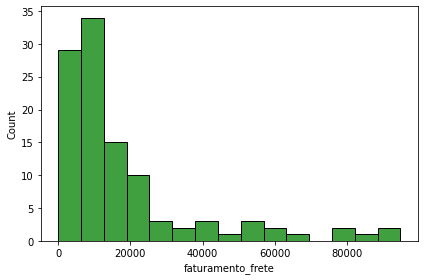

In [15]:
sns.histplot(df['faturamento_frete'],  color="green")

plt.tight_layout()

 👉🏼 

Quais os departamentos com mais faturamento? E com mais lucro?

In [22]:
df_.groupby('departamento').agg({'faturamento_total': ['sum']})

,faturamento_total
,sum
departamento,
Bolas de Gude,464448.7
Cadeiras,6141458.0
Maquinas Fotogr ficas,18826450.0


In [26]:
df_.groupby('departamento').agg({'lucro': ['sum']})

,lucro
,sum
departamento,
Bolas de Gude,111036.4
Cadeiras,-234484.0
Maquinas Fotogr ficas,294780.0


In [34]:
df_.groupby(['departamento','uf']).agg({'conversao': ['max','mean']})

conversao          
                               max      mean
departamento          uf                    
Bolas de Gude         MT  0.154214  0.105591
                      PE  0.120513  0.092752
                      SP  0.136864  0.102376
Cadeiras              MT  0.111834  0.073476
                      PE  0.091110  0.057694
                      SP  0.082748  0.058437
Maquinas Fotogr ficas MT  0.151845  0.105517
                      PE  0.139040  0.077098
                      SP  0.116859  0.077073

In [38]:
df_.groupby('departamento').agg({'custo_frete':['mean','sum'],'custo_mkt': ['mean','sum']})

custo_frete              custo_mkt        
                               mean      sum          mean     sum
departamento                                                      
Bolas de Gude           6345.583333   228441   1361.555556   49016
Cadeiras               33612.500000  1210050  20388.888889  734000
Maquinas Fotogr ficas  19560.833333   704190  20692.500000  744930

In [10]:
df_['desconto_frete'].nunique()

73

In [39]:
df_.corr()

,item,faturamento_produto,faturamento_frete,custo_produto,custo_frete,custo_mkt,desconto_produto,desconto_frete,visitas,vendas,faturamento_total,custo_total,desconto_total,lucro,conversao
item,1.000000,0.211554,-0.121029,0.220571,-0.137678,-0.100031,0.150372,-0.054921,0.000000,0.000000,0.202355,0.191027,0.104307,0.112784,0.000000
faturamento_produto,0.211554,1.000000,-0.006745,0.994069,0.359845,0.576005,0.699155,0.707289,-0.316896,-0.280133,0.997384,0.992905,0.752771,0.074556,0.130151
faturamento_frete,-0.121029,-0.006745,1.000000,-0.061291,0.856041,0.683868,0.370858,-0.055891,0.595697,0.415020,0.065555,0.044778,0.279380,-0.069022,-0.176680
custo_produto,0.220571,0.994069,-0.061291,1.000000,0.312350,0.544930,0.707145,0.713396,-0.361618,-0.297101,0.987523,0.993213,0.760824,0.004729,0.178485
custo_frete,-0.137678,0.359845,0.856041,0.312350,1.000000,0.911597,0.649797,0.454975,0.373836,0.252259,0.420959,0.419283,0.643327,-0.236057,-0.054634
custo_mkt,-0.100031,0.576005,0.683868,0.544930,0.911597,1.000000,0.746891,0.610620,0.117837,0.130313,0.624213,0.636559,0.763842,-0.277173,0.096409
desconto_produto,0.150372,0.699155,0.370858,0.707145,0.649797,0.746891,1.000000,0.655802,0.051196,0.131584,0.724475,0.754737,0.977698,-0.485036,0.305118
desconto_frete,-0.054921,0.707289,-0.055891,0.713396,0.454975,0.610620,0.655802,1.000000,-0.240048,-0.154543,0.701744,0.738509,0.799723,-0.390864,0.258078
visitas,0.000000,-0.316896,0.595697,-0.361618,0.373836,0.117837,0.051196,-0.240048,1.000000,0.735191,-0.273161,-0.305530,-0.026065,0.019454,-0.208588
vendas,0.000000,-0.280133,0.415020,-0.297101,0.252259,0.130313,0.131584,-0.154543,0.735191,1.000000,-0.249536,-0.252853,0.061651,-0.198403,0.389315


In [40]:
# ROI = (Ganho obtido – Investimento) / Investimento

#(df_['lucro'] - (df_['custo_total'] + df_['desconto_total'])) / (df_['custo_total'] + df_['desconto_total'])

0     -0.762238
9     -0.762238
18    -0.762238
27    -0.356828
36    -0.356828
         ...   
927   -0.694118
936   -0.907692
945   -0.719512
954   -0.750000
963   -0.828125
Length: 108, dtype: float64

In [42]:
df_['faturamento_frete'] - df_['custo_frete'] - df_['desconto_frete']

0       694.0
9       904.0
18      722.0
27     2980.0
36     2196.0
        ...  
927    1100.0
936    1450.0
945    2160.0
954    2770.0
963    3390.0
Length: 108, dtype: float64

* diminuir valor do frete
* aumentar mkt para aumentar conversão


b. Qual ação você sugere como mais efetiva para aumento de vendas, investimento
em propaganda, desconto em preço ou desconto em frete e porquê?
c. Cite outras conclusões importantes você consegue analisar

https://www.sebrae.com.br/sites/PortalSebrae/artigos/como-elaborar-um-plano-de-negocio,37d2438af1c92410VgnVCM100000b272010aRCRD

https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator

